In [1]:
import tensorflow as tf 
from tensorflow import keras
import os 
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import cv2
from scipy import ndimage
import sys 
import random 

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from albumentations import CenterCrop, RandomRotate90, GridDistortion, HorizontalFlip, VerticalFlip

In [2]:
# base_path = 'D:/Dropbox/WORK/SNUH/Atopy Segmentation'
base_path = 'C:/Users/user/Desktop/datasets/Atopy Segmentation'
# path_8 = os.path.join(base_path, 'Intersect_0.8')
paths = ['Intersect_0.75', 'Intersect_0.8', 'Intersect_0.85']
grades = ['Grade0', 'Grade1', 'Grade2', 'Grade3']

# path = paths[2]
# grade = grades[3]
# N_RES = 256
num_res = 256
num_classes = [0, 1, 2, 3]
grades_dict = {0 : 'Grade0', 1 : 'Grade1', 2 : 'Grade2', 3 : 'Grade3'}

In [3]:
# x_train = {}
# y_train = {}

# x_test = {}
# y_test = {}

# x_extra = {}
# y_extra = {} 


# for path in paths:  
# for grade in grades:
train_list = glob(os.path.join(base_path, paths[2], 'Atopy_Segment_Train', f'*/*.jpg'))
# y_train_list = glob(os.path.join(base_path, paths[2], 'Atopy_Segment_Train', f'*/*.png'))

test_list = glob(os.path.join(base_path, paths[2], 'Atopy_Segment_Test', f'*/*.jpg'))
# y_test_list = glob(os.path.join(base_path, paths[2], 'Atopy_Segment_Test', f'*/*.png'))

extra_list = glob(os.path.join(base_path, paths[2], 'Atopy_Segment_Extra', f'*/*.jpg'))
# y_extra_list = glob(os.path.join(base_path, paths[2], 'Atopy_Segment_Extra', f'*/*.png'))

In [4]:
def create_dataset(data_list, dtype='train'):
    images = [] 
    masks = [] 
    labels = [] 
    
    for x in data_list:
        img = cv2.imread(x, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (num_res, num_res)) / 255.
        
        y = x[:-4] + '.png'
        
        if os.path.isfile(y) == False:
            print(f'Not found mask file : {x}') 
            # none_mask += 1
            continue
        
        msk = cv2.imread(y, 0)
        msk = cv2.resize(msk, (num_res, num_res))
        msk[msk > 0] = 1.
        msk = np.float32(msk)

        lbl = np.float32(y.split('\\')[-2][-1])
        
        images.append(img) 
        masks.append(msk) 
        labels.append(lbl) 
        
        # if dtype == 'train':
        
        #     if np.random.randint(2) > 0:
        #         aug = RandomRotate90(p=1.0)
        #         augmented = aug(image=img, mask=msk)
        #         images.append(augmented['image'])
        #         masks.append(augmented['mask'])
        #         labels.append(lbl) 

        #     if np.random.randint(2) > 0:
        #         aug = GridDistortion(p=1.0)
        #         augmented = aug(image=img, mask=msk)
        #         images.append(augmented['image'])
        #         masks.append(augmented['mask'])
        #         labels.append(lbl) 

        #     if np.random.randint(2) > 0:
        #         aug = HorizontalFlip(p=1.0)
        #         augmented = aug(image=img, mask=msk)
        #         images.append(augmented['image'])
        #         masks.append(augmented['mask'])
        #         labels.append(lbl) 

        #     if np.random.randint(2) > 0:
        #         aug = VerticalFlip(p=1.0)
        #         augmented = aug(image=img, mask=msk)
        #         images.append(augmented['image'])
        #         masks.append(augmented['mask'])
        #         labels.append(lbl) 
        
    # 
    images = np.reshape(images, [-1, num_res, num_res, 3])
    masks = np.reshape(masks, [-1, num_res, num_res, 1])
    labels = np.reshape(labels, [-1, 1])
    
    # mixed_list = list(zip(images, masks, labels))
    # random.shuffle(mixed_list) # shuffle
    # images, masks, labels = zip(*mixed_list)
    idx = np.arange(images.shape[0])
    np.random.shuffle(idx) 
    
    images = images[idx]
    masks = masks[idx]
    labels = labels[idx]
    
    return images, masks, labels

In [5]:
train_images, train_masks, train_labels = create_dataset(train_list)
test_images, test_masks, test_labels = create_dataset(test_list, dtype='test')
extra_images, extra_masks, extra_labels = create_dataset(extra_list, dtype='extra')

train_images.shape, test_images.shape, extra_images.shape

Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Train\Grade2\0391.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Train\Grade2\0807.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Test\Grade1\8171.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Test\Grade2\6990.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Test\Grade2\6995.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Test\Grade2\7331.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Test\Grade2\7338.jpg
Not found mask file : C:/Users/user/Desktop/datasets/Atopy Segmentation\Intersect_0.85\Atopy_Segment_Extra\Grade1\9902.jpg


((1064, 256, 256, 3), (630, 256, 256, 3), (720, 256, 256, 3))

In [6]:
train_masks.shape, train_labels.shape

((1064, 256, 256, 1), (1064, 1))

c:\ProgramData\Miniconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


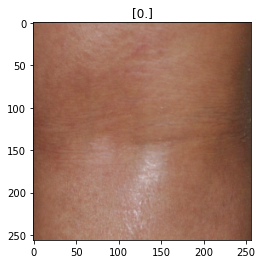

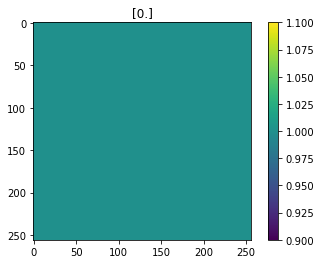

In [7]:
plt.imshow(train_images[1])
plt.title(train_labels[1])
plt.show() 

plt.imshow(train_masks[1])
plt.title(train_labels[1])
plt.colorbar()
plt.show()

In [8]:
def create_mask(pred_mask):
    # pred_mask = tf.argmax(pred_mask, axis=-1)
    # pred_mask = pred_mask[..., tf.newaxis]
    # return pred_mask[0]
    return np.squeeze(pred_mask, axis=0)

# from IPython.display import clear_output

def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [9]:
# import sys 
# sys.path.append('../')
# from segmentation_models2 import segmentation_models as sm
# sm.set_framework('tf.keras')
# sm.framework()

# tr = True
# model = sm.Unet('efficientnetb4', encoder_weights='imagenet', activation='sigmoid', input_shape=(num_res, num_res, 3))
# preprocess_input = sm.get_preprocessing('efficientnetb4')


In [10]:
# with open('modelsummary.txt', 'w') as f:
#     model.summary(print_fn=lambda x: f.write(x + '\n'))

In [11]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3
import tensorflow as tf

print("TF Version: ", tf.__version__)

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(inputs, skip, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip])
    x = conv_block(x, num_filters)
    return x


TF Version:  2.8.0


In [12]:
def build_effienet(input_shape):
    
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained Encoder """
    encoder = EfficientNetB3(include_top=False, weights="imagenet", input_tensor=inputs)

    s1 = encoder.get_layer("input_1").output                      ## 256
    s2 = encoder.get_layer("block2a_expand_activation").output    ## 128
    s3 = encoder.get_layer("block3a_expand_activation").output    ## 64
    s4 = encoder.get_layer("block4a_expand_activation").output    ## 32

    """ Bottleneck """
    b1 = encoder.get_layer("block6a_expand_activation").output    ## 16

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)                               ## 32
    d2 = decoder_block(d1, s3, 256)                               ## 64
    d3 = decoder_block(d2, s2, 128)                               ## 128
    d4 = decoder_block(d3, s1, 64)                                ## 256

    """ Output """
    x1 = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
    
    # """ Classification """
    # x2 = encoder.output
    # x2 = encoder.get_layer("input_1").output
    x2 = tf.keras.layers.GlobalAveragePooling2D()(b1) 
    x2 = tf.keras.layers.Dense(4)(x2) 
    x2 = tf.keras.layers.BatchNormalization()(x2) 
    x2 = tf.keras.layers.Softmax()(x2) 

    # model = Model(inputs, outputs, name="EfficientNetB0_UNET")
    model = Model(inputs, [x1, x2], name="EfficientNetB0_UNET")
    # encoder_model = Model(inputs, b1)
    # seg_model = Model(inputs, x1)
    # return encoder_model, seg_model
    return model


In [13]:
# if __name__ == "__main__":
input_shape = (num_res, num_res, 3)
model = build_effienet(input_shape)
# model = build_effienet_seg(input_shape)
# model = build_effienet_multi(input_shape)
# model.summary()

In [14]:
def dice_score_loss(y_true, y_pred):
    numerator = 2. * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return tf.reduce_mean(1 - numerator / denominator)

In [15]:
# LR = 0.001
# n_classes = 4


# define optomizer
# optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# dice_loss = sm.losses.DiceLoss()
# focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
# total_loss = dice_loss + (1 * focal_loss)

# metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', mode='auto', factor=0.2, patience=5, min_lr=0.0001)

# def loss_fn(y_true, y_pred):
#     cls_labels = tf.cast(y_true[:,:1], tf.int64)
#     loc_labels = y_true[:,1:]
#     cls_preds = y_pred[:,:2]
#     loc_preds = y_pred[:,2:]
#     loc_loss = keras.losses.MeanSquaredError()(loc_labels, loc_preds)
#     cls_loss = keras.losses.SparseCategoricalCrossentropy()(cls_labels, cls_preds)
#     return cls_loss + 5*loc_loss

# ''' Multi '''
model.compile(
    # optimizer=[keras.optimizers.Adam(0.001), 
    #            keras.optimizers.Adam(0.001)],
    optimizer=keras.optimizers.Adam(0.001),
    # loss=[keras.losses.MeanSquaredError(),
    #       keras.losses.SparseCategoricalCrossentropy()],
    loss=[dice_score_loss,
          keras.losses.SparseCategoricalCrossentropy()],
    metrics=['accuracy'],
)

''' Segmentation '''
# seg_model.compile(
#     keras.optimizers.Adam(0.001), 
#     loss=dice_score_loss,
#     metrics=['accuracy'],
# )

# ''' Classification '''
# seg_model.compile(
#     keras.optimizers.Adam(0.001), 
#     loss=keras.losses.SparseCategoricalCrossentropy(),
#     metrics=['accuracy'],
# )

' Segmentation '

In [16]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

hist = model.fit(train_images,
                #  train_masks,
                # train_labels,
                [train_masks, train_labels],
                 batch_size=16,
                 epochs=50,
                #  validation_split=0.3,
                validation_data=(extra_images, [extra_masks, extra_labels]),
                # validation_data=(extra_images, extra_labels),
                # validation_data=(extra_images, extra_masks),
                 shuffle=True,
                #  callbacks=[early]
                 )

Epoch 1/50
67/67 [==============================] - 36s 395ms/step - loss: 1.1092 - conv2d_8_loss: 0.0969 - softmax_loss: 1.0123 - conv2d_8_accuracy: 0.8824 - softmax_accuracy: 0.5667 - val_loss: 5.6516 - val_conv2d_8_loss: 0.9960 - val_softmax_loss: 4.6556 - val_conv2d_8_accuracy: 0.1517 - val_softmax_accuracy: 0.0056
Epoch 2/50
67/67 [==============================] - 23s 346ms/step - loss: 0.8803 - conv2d_8_loss: 0.0595 - softmax_loss: 0.8208 - conv2d_8_accuracy: 0.9125 - softmax_accuracy: 0.6786 - val_loss: 2.8430 - val_conv2d_8_loss: 0.9999 - val_softmax_loss: 1.8432 - val_conv2d_8_accuracy: 0.1517 - val_softmax_accuracy: 0.0056
Epoch 3/50
67/67 [==============================] - 23s 348ms/step - loss: 0.8326 - conv2d_8_loss: 0.0481 - softmax_loss: 0.7845 - conv2d_8_accuracy: 0.9243 - softmax_accuracy: 0.6936 - val_loss: 2.4645 - val_conv2d_8_loss: 0.9808 - val_softmax_loss: 1.4837 - val_conv2d_8_accuracy: 0.1545 - val_softmax_accuracy: 0.4847
Epoch 4/50
67/67 [===================

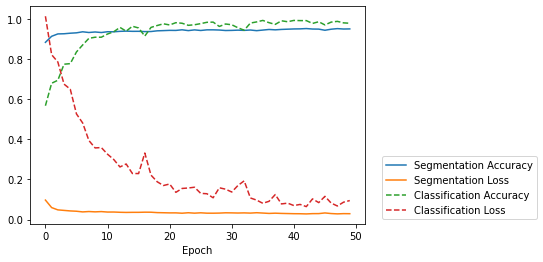

In [17]:
plt.plot(hist.history['conv2d_8_accuracy'], label='Segmentation Accuracy')
plt.plot(hist.history['conv2d_8_loss'], label='Segmentation Loss')
plt.plot(hist.history['softmax_accuracy'], '--', label='Classification Accuracy')
plt.plot(hist.history['softmax_loss'], '--', label='Classification Loss')
plt.legend(loc=(1.05, 0.02))
plt.xlabel('Epoch')
plt.show() 

In [18]:
model.evaluate(test_images, [test_masks, test_labels], batch_size=16)

40/40 [==============================] - 4s 81ms/step - loss: 5.1310 - conv2d_8_loss: 0.0675 - softmax_loss: 5.0635 - conv2d_8_accuracy: 0.8748 - softmax_accuracy: 0.0714


[5.131004333496094,
 0.06752509623765945,
 5.063478469848633,
 0.8748221397399902,
 0.0714285746216774]

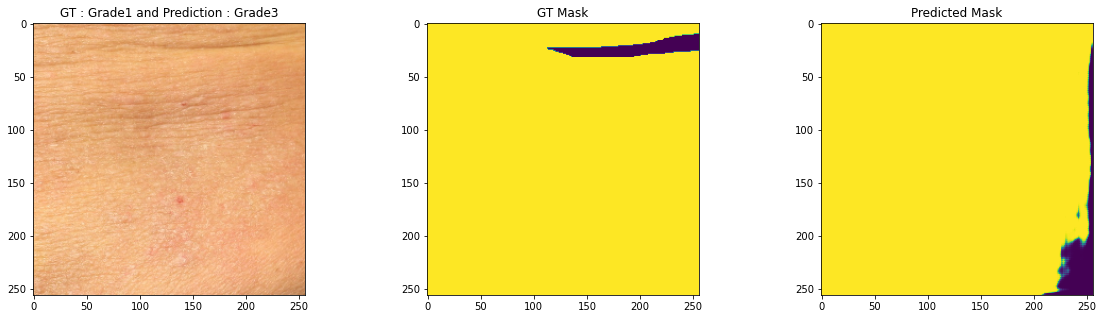

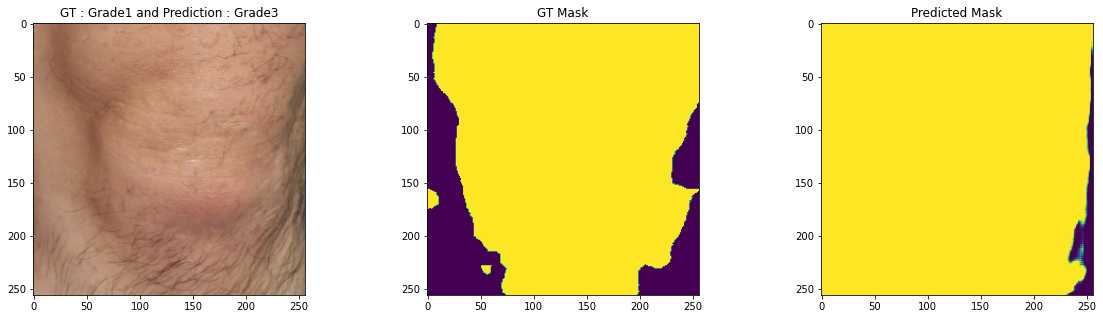

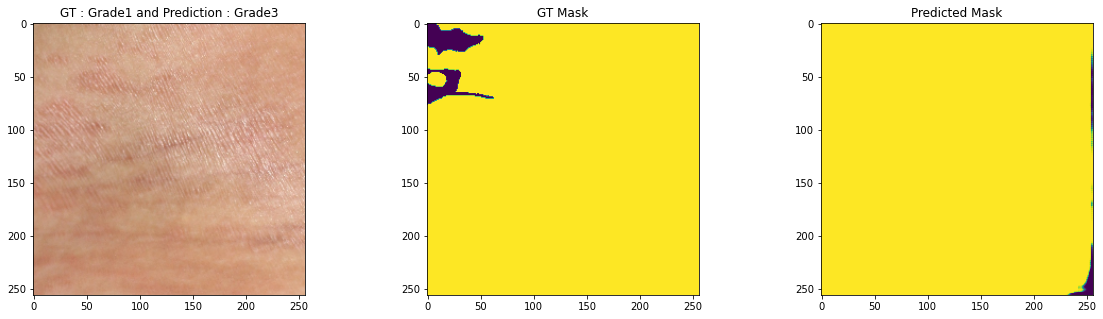

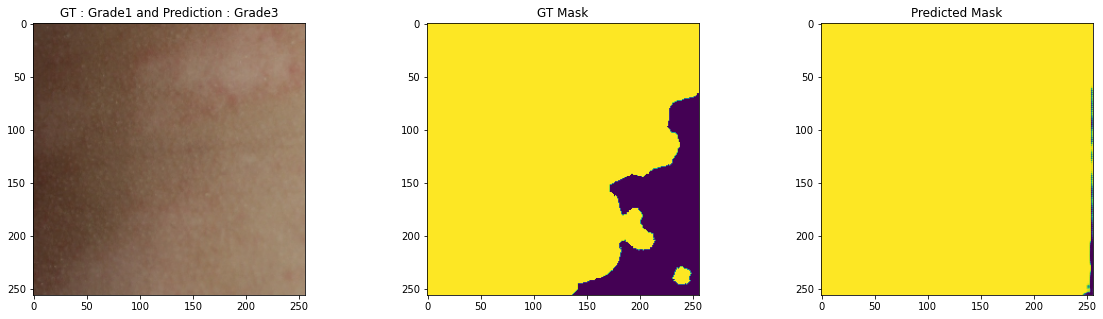

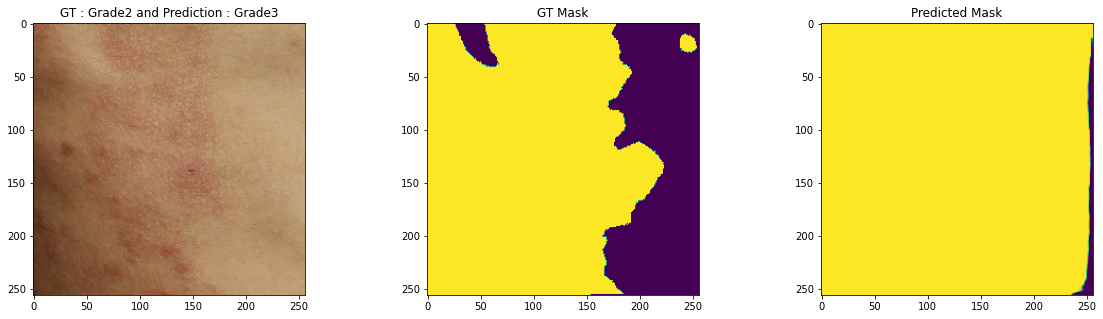

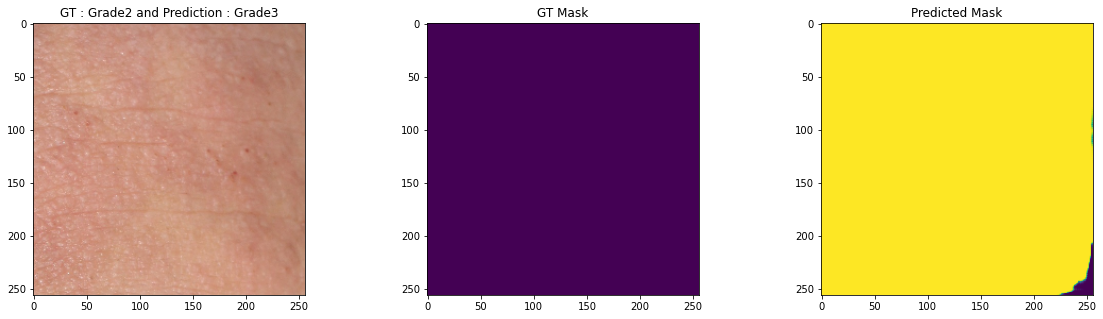

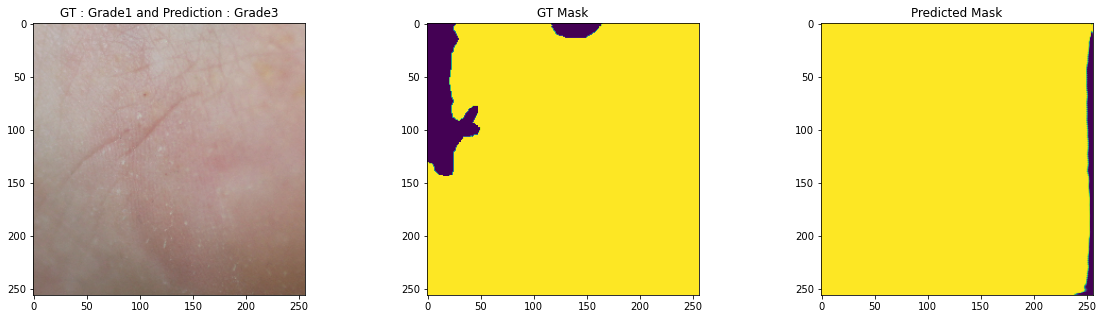

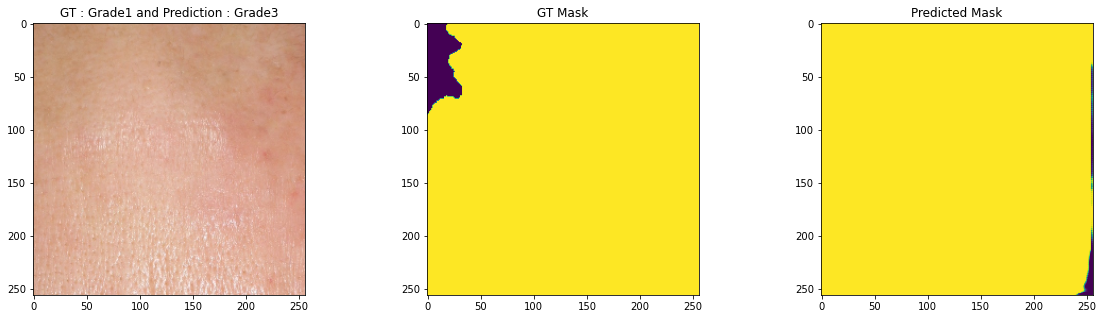

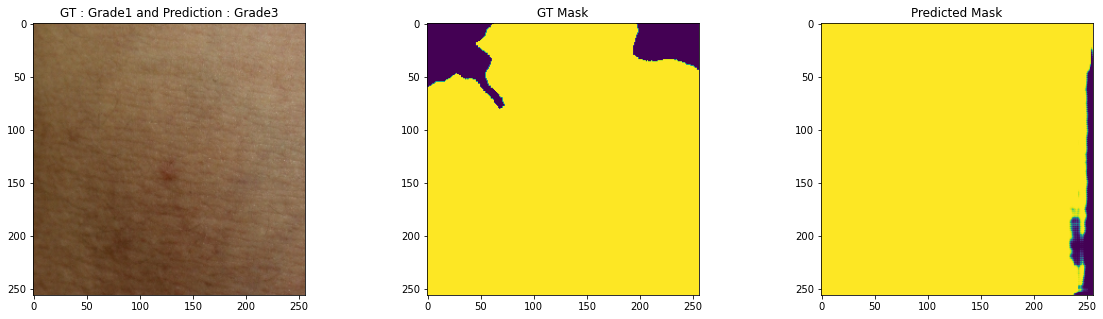

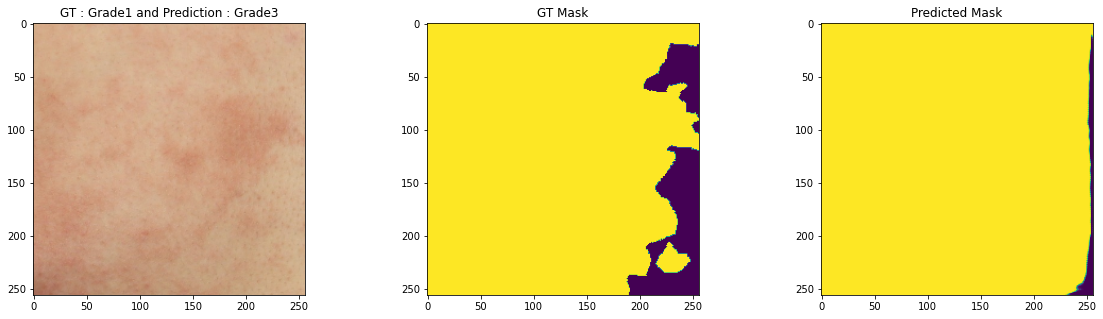

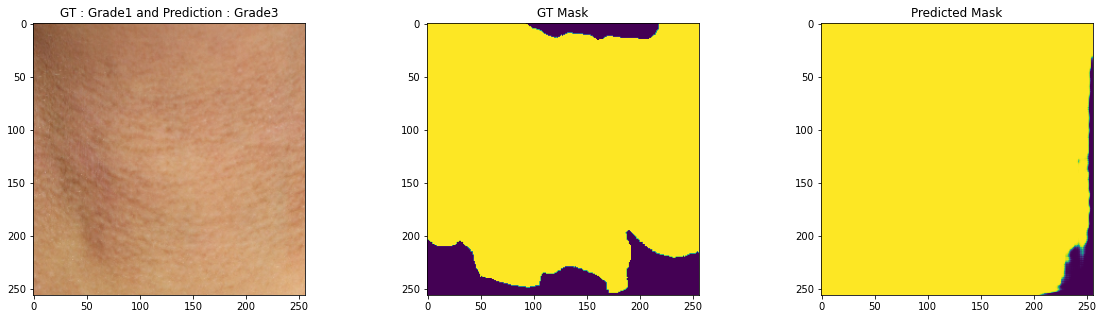

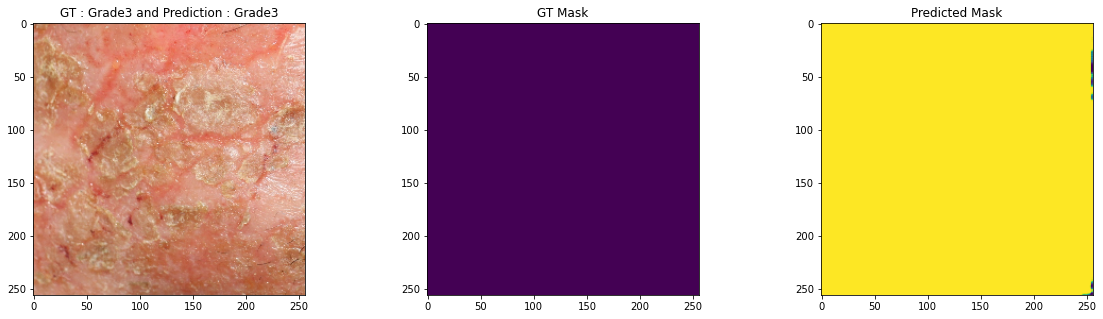

In [19]:
cnt = 0 
for img, msk, lbl in zip(test_images, test_masks, test_labels): 
    
    pred = model.predict(img[tf.newaxis, ...])
    # print(pred[0].squeeze(0).shape)
    # print(pred.shape)
    # stack_img = np.stack([img, pred[0].squeeze(0)], axis=1)
    # print(grades_dict[lbl[0]])
    # print(grades_dict[np.argmax(pred[1])])
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1).set_title(f'GT : {grades_dict[lbl[0]]} and Prediction : {grades_dict[np.argmax(pred[1])]}')
    plt.imshow(img)
    
    plt.subplot(1, 3, 2).set_title('GT Mask')
    plt.imshow(msk)
    
    plt.subplot(1, 3, 3).set_title('Predicted Mask')
    plt.imshow(pred[0].squeeze(0))
    plt.show()
    
    # print(f'GT : {lbl} and Pred : {np.argmax(pred[1])}')
    
    # break
    if cnt > 10:
        break 
    cnt += 1